In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('crimes.csv')
df.shape

(568293, 10)

In [6]:
df.head(2)

,dt,region,police_district,police_merhav,police_station,crime_group,crime_type,tikim_sum,social_rank,population
0,2018-01-01,אילת,מחוז דרומי,מרחב אילת דרום,מרחב אילת דרום,NaN,NaN,199,6,52285
1,2018-04-01,אילת,מחוז דרומי,מרחב אילת דרום,מרחב אילת דרום,NaN,NaN,301,6,52285


In [10]:
df['region'].nunique(), df['police_district'].nunique(), df['social_rank'].nunique()

(163, 7, 9)

In [12]:
(df['dt'].min(), df['dt'].max())

('2018-01-01', '2023-01-01')

In [20]:
from joypy import joyplot

In [41]:
to_plot = (df.groupby(['region', 'social_rank'], as_index=False)
           .apply(lambda gp: gp['tikim_sum'].sum() / gp['population'].max())).rename(columns={None: 'tikim_normal'})

In [42]:
to_plot

,region,social_rank,tikim_normal
0,אבו סנאן,3,0.128245
1,אבן יהודה,9,0.135062
2,אום אל פחם,2,0.134990
3,אופקים,3,0.244439
4,אור יהודה,5,0.236464
...,...,...,...
158,שוהם,9,0.079259
159,שפרעם,3,0.193548
160,תל אביב יפו,8,0.426606
161,תל מונד,9,0.141966


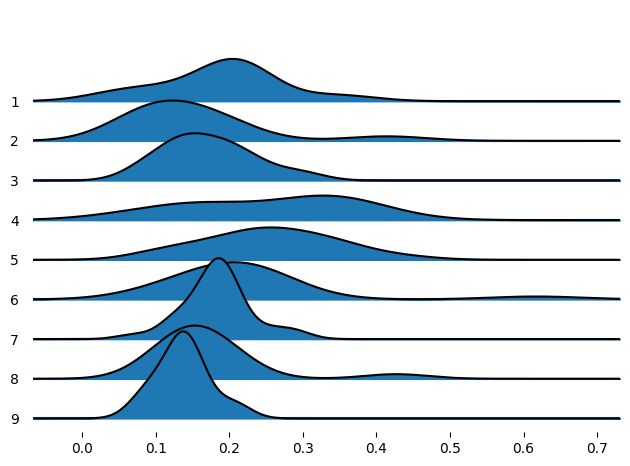

In [44]:
joyplot(to_plot, by='social_rank',column='tikim_normal');

In [46]:
""" Data do not behave as though: as higher the social rank, the lower the crime cases per capita
The primery suspect: NaN that we saw in df.head, need to clearn the dataset"""

' Data do not behave as though: as higher the social rank, the lower the crime cases per capita\nThe primery suspect: NaN that we saw in df.head'

In [47]:
df.isna().mean()

dt                 0.00000
region             0.00000
police_district    0.00000
police_merhav      0.00000
police_station     0.00000
crime_group        0.00691
crime_type         0.00691
tikim_sum          0.00000
social_rank        0.00000
population         0.00000
dtype: float64

In [48]:
""" we see that under crime_group and crime_type the report is not full and detailed (NaN)"""

' we see that under crime_group and crime_type the report is not full and detailed (NaN)'

In [49]:
""" Maybe even something worst is correlated in low social rank cities that too much activity/crime leads to sloppy reports"""

' Maybe even something worst is correlated in low social rank cities that too much activity/crime leads to sloppy reports'

In [52]:
# is crime type and crime group exactly relate in missing reports
(df['crime_type'].isna() == df['crime_group'].isna()).all()

True

<Axes: ylabel='Frequency'>

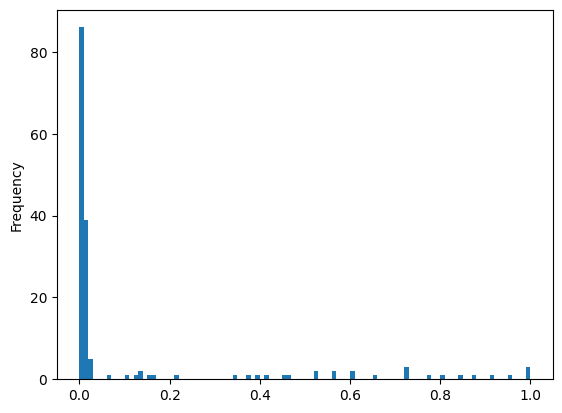

In [61]:
# Are there cities that specifically mess up the data?
to_plot = df.groupby('region').apply(lambda gp: gp['crime_type'].isna().mean())
to_plot.plot.hist(bins=100)
# we see that there are several problematic cities in reports. May be agressivly delete them will improve our hypothesis

<Axes: ylabel='Frequency'>

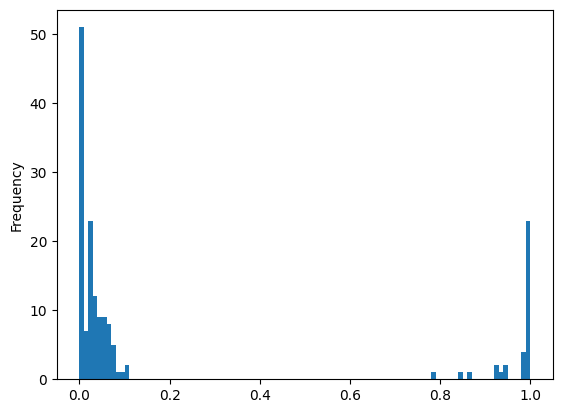

In [68]:
# We sum up the cases per cities ('region') that crime type is NaN from total cases (tikim)
to_plot = df.groupby('region').apply(lambda gp: gp[gp['crime_type'].isna()]['tikim_sum'].sum() / gp['tikim_sum'].sum())
to_plot.plot.hist(bins=100)

In [69]:
#It is obviouse that there are some cities that are outliers and contribute to bad reports
# we will delete them and look at the data after deleting them

In [74]:
df = df.groupby('region').filter(lambda gp: gp[gp['crime_type'].isna()]['tikim_sum'].sum() /
                                 gp['tikim_sum'].sum()< 0.5)

In [77]:
to_plot = (df.groupby(['region', 'social_rank'], as_index=False)
           .apply(lambda gp: gp['tikim_sum'].sum() / gp['population'].max())).rename(columns={None: 'tikim_normal'})
to_plot

,region,social_rank,tikim_normal
0,אבן יהודה,9,0.135062
1,אופקים,3,0.244439
2,אור יהודה,5,0.236464
3,אור עקיבא,5,0.264549
4,אזור,7,0.182343
...,...,...,...
123,שגב שלום,1,0.348939
124,שדרות,5,0.361670
125,שוהם,9,0.079259
126,תל אביב יפו,8,0.426606


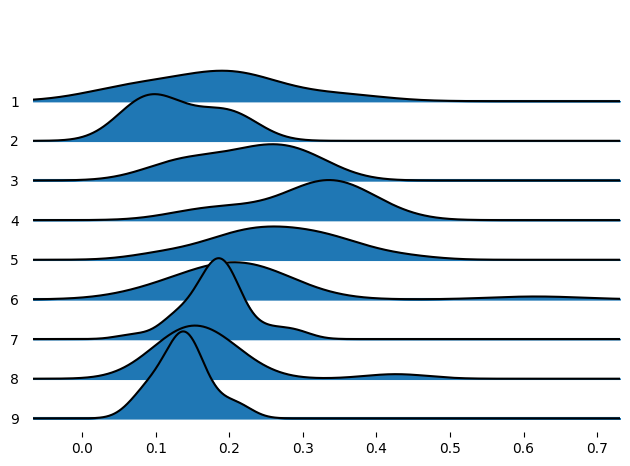

In [78]:
joyplot(to_plot,
        by='social_rank',
        column='tikim_normal');

In [81]:
# not specific fix
# try to filter it according to the 3 low social rank and look and num of cases/capita
to_plot[to_plot['social_rank'] <=3].sort_values('tikim_normal')

,region,social_rank,tikim_normal
53,מודיעין עילית,1,0.046653
118,רכסים,2,0.078042
15,ביתר עילית,1,0.083757
6,אלעד,2,0.084147
16,בני ברק,2,0.098156
51,מג'דל שמס,3,0.121299
43,כסיפה,1,0.136968
14,בית שמש,2,0.137902
42,כאבול,3,0.158709
33,חורה,1,0.181358


In [ ]:
#May be we need to change hypothesis since say about 5 points will not change things radically
# we need to look at sub fields in each region and anlyze differently to find other correlations